In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Packages for Logistic Regression & Confusion Matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
df_train=pd.read_csv("train.csv")

In [6]:
df_train[:3]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.0,2,1.0,0.0,184866.69,0


In [7]:
df_test=pd.read_csv("test.csv")

In [8]:
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [10]:
df_train=df_train.drop(['id','CustomerId','Surname'],axis=1)
df_train.columns=['credit_score', 'country', 'gender','age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']

In [11]:
df_train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [12]:
y=df_train['churn'].value_counts(normalize=True)
y

0    0.788401
1    0.211599
Name: churn, dtype: float64

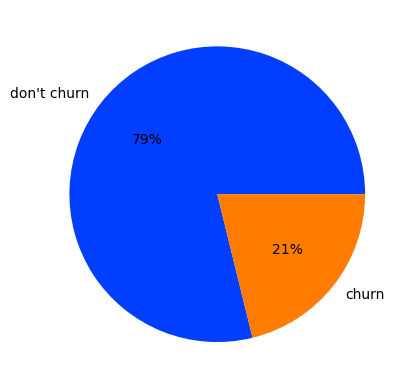

In [13]:
colors=sns.color_palette('bright')[:5]
labels = ["don't churn", 'churn',]
plt.pie([y[0],y[1]],labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [14]:
df_train.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x15c809813f0>,
 'caps': [<matplotlib.lines.Line2D at 0x15c80981930>,
 'boxes': [<matplotlib.lines.Line2D at 0x15c80981150>],
 'medians': [<matplotlib.lines.Line2D at 0x15c80981e70>],
 'fliers': [<matplotlib.lines.Line2D at 0x15c80982110>],
 'means': []}

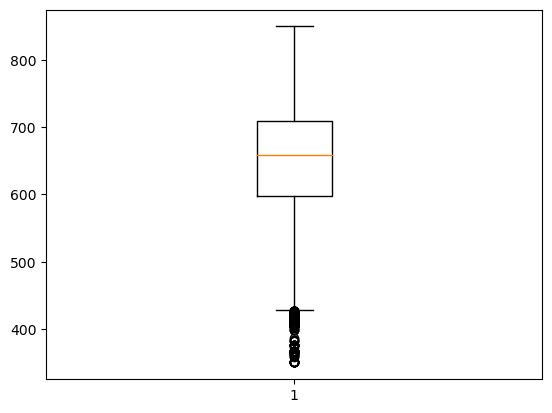

In [15]:
plt.boxplot(df_train['credit_score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x15c827e8eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x15c827e93f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15c827e8c10>],
 'medians': [<matplotlib.lines.Line2D at 0x15c827e9960>],
 'fliers': [<matplotlib.lines.Line2D at 0x15c827e9c00>],
 'means': []}

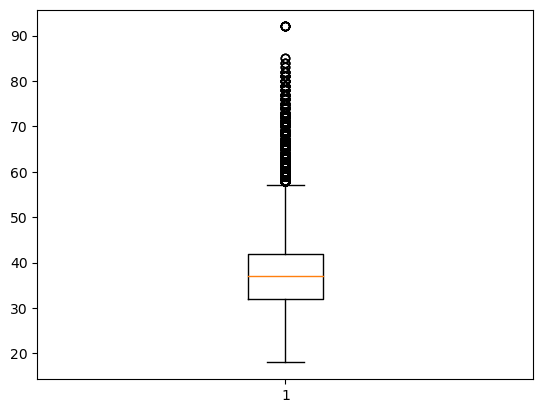

In [16]:
plt.boxplot(df_train['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x15c82851210>,
 'caps': [<matplotlib.lines.Line2D at 0x15c82851750>,
 'boxes': [<matplotlib.lines.Line2D at 0x15c82850f70>],
 'medians': [<matplotlib.lines.Line2D at 0x15c82851c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x15c82851f30>],
 'means': []}

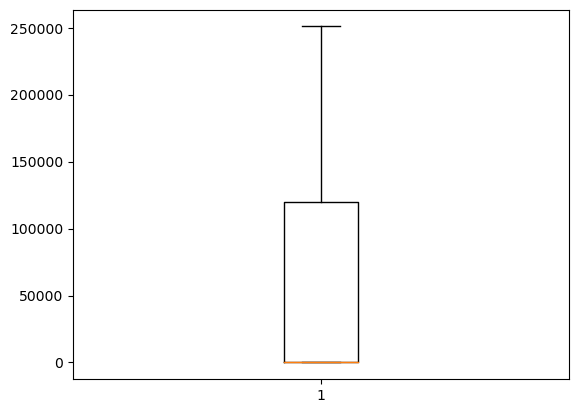

In [17]:
plt.boxplot(df_train['balance'])

In [18]:
for column in ['credit_score', 'age', 'balance']:
    threshold=df_train[column].quantile(0.95)
    df_train.loc[df_train[column]>threshold,column]=threshold
    

In [19]:
df_train.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,654.591139,37.838293,5.020353,54843.726553,1.554455,0.753954,0.497770,112574.822734,0.211599
std,76.366089,8.077647,2.806159,61714.913577,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,787.000000,56.000000,10.000000,151671.550000,4.000000,1.000000,1.000000,199992.480000,1.000000


#Encoding categorical variables


In [20]:
df_train['gender2']=np.where(df_train['gender']=='Male',1,0)
df_train[['gender','gender2']].tail()

,gender,gender2
165029,Female,0
165030,Male,1
165031,Male,1
165032,Female,0
165033,Male,1


In [21]:
# Convert the categorical column country into numeric through one-hot encoding.
df_train.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [22]:
ohe=OneHotEncoder()
feature_arry = ohe.fit_transform(df_train[["country"]]).toarray()
print(feature_arry)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [23]:
feature_labels = ohe.categories_
feature_labels = np.array(feature_labels).ravel()
print(feature_labels)


['France' 'Germany' 'Spain']


In [24]:
ohe_country = pd.DataFrame(feature_arry, columns = feature_labels)


In [31]:
df_train = pd.concat([df_train, ohe_country], axis = 1)
df_train[['country','France', 'Germany', 'Spain']].head(20)

KeyError: "['country'] not in index"

In [ ]:
Determine whether assumptions have been met
The following are the assumptions for logistic regression:

Independent observations (This refers to how the data was collected.)

No extreme outliers

Little to no multicollinearity among X predictors

Linear relationship between X and the logit of y

For the first assumption, you can assume that observations are independent for this dataset.

The second assumption has already been addressed.

The last assumption will be verified after modeling.
Collinearity
We'll check the correlation among predictor variables

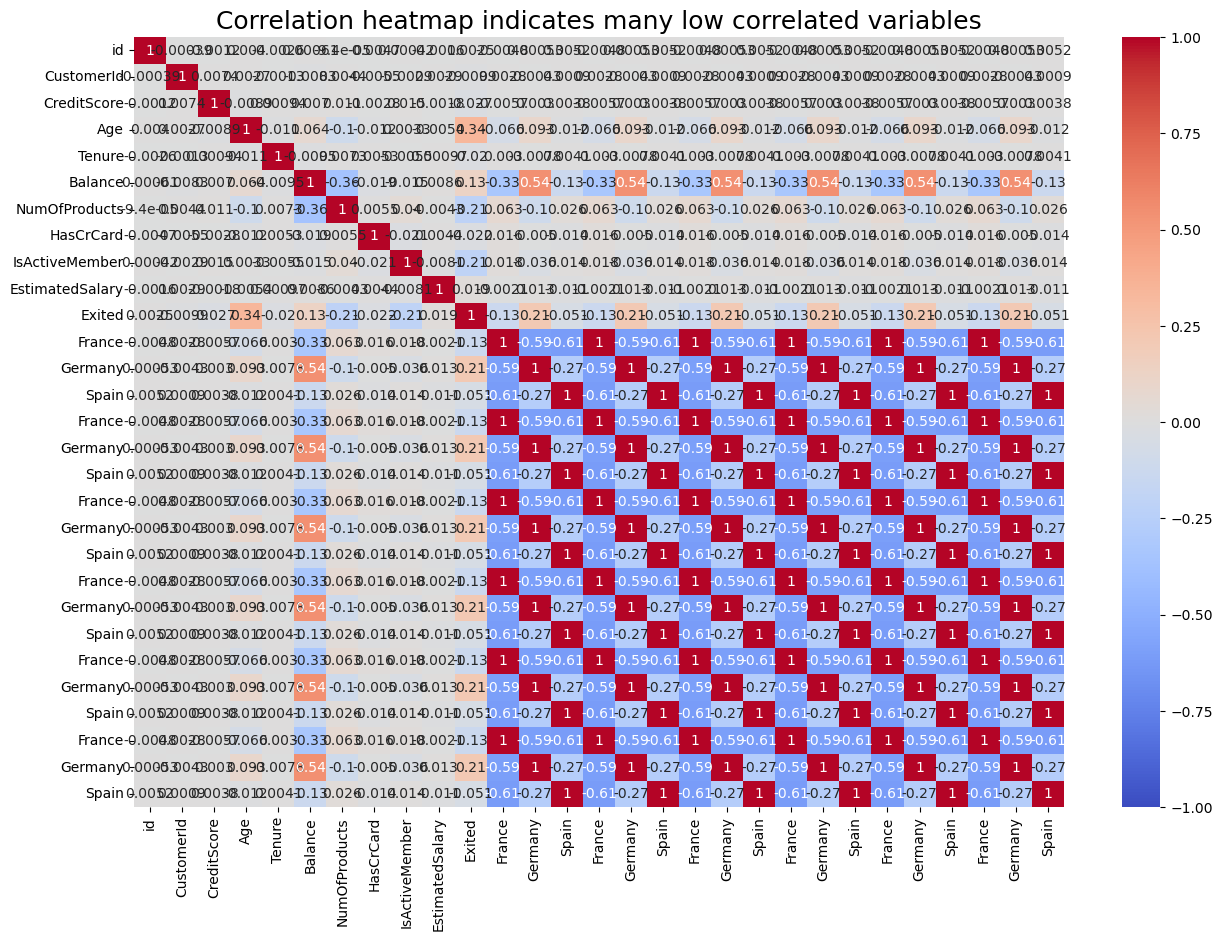

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(method='pearson', numeric_only = True), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show();